In [392]:
import pandas as pd
import numpy as np
from csv import reader
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

### Low rank Approximation 

In [393]:
train_d = pd.read_csv("MovieLens/ml80.train", delimiter='\t',header=None)
train_d.columns = ['i','j','val']
test_d = pd.read_csv("MovieLens/ml20.test", delimiter='\t',header=None)
test_d.columns = ['i','j','val']

In [394]:
x_size = train_d['i'].max()
y_size = train_d['j'].max()

In [395]:
x_co_train, y_co_train, val_train = train_d['i'], train_d['j'],train_d['val']
x_co_test, y_co_test, val_test = test_d['i'], test_d['j'],test_d['val']

In [396]:
A_train=np.zeros((x_size,y_size))

In [397]:
A_train.shape

(943, 1682)

In [398]:
for i in range(len(val_train)):
    A_train[x_co_train[i]-1][y_co_train[i]-1]=val_train[i]
    

In [399]:
U, sigma, VT = np.linalg.svd(A_train, full_matrices=True)

In [400]:
def error(x_co_test,y_co,test,val_test,Pred):
    err = 0
    for i in range(len(val_test)):
        err = err +  (val_test[i] - Pred[x_co_test[i]-1][y_co_test[i]-1])**2
    return err

In [401]:
def find_k_rank_approx(U,sigma,VT, k):
    U=U[:,:k]
    VT=VT[:k,:]
    sigma = sigma[:k]
    sigma = np.diag(sigma)
    Pred = np.dot(np.dot(U,sigma),VT)
    return Pred

In [402]:
k_lst = [i for i in range(1,101)]

In [403]:
err_lst=[]
for i in k_lst:
    Pred = find_k_rank_approx(U,sigma,VT,i)
    err = error(x_co_test,y_co,test,val_test,Pred)
    err_lst.append(err)
    

In [404]:
min_err = min(err_lst)
min_err_idx = err_lst.index(min_err)

In [406]:
min_err_k = k_lst[min_err_idx]
print("The value of k for minimum error is : ", min_err_k)

The value of k for minimum error is :  13


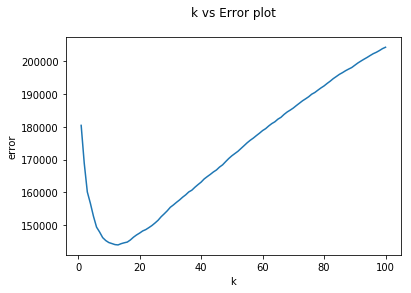

In [408]:
plt.plot(k_lst,err_lst)
plt.title("k vs Error plot\n")
plt.xlabel("k")
plt.ylabel("error")
plt.show()

### Fitting regreesion curve

In [409]:
mu=np.zeros((x_size))
count_mu=np.zeros((x_size))
eta=np.zeros((y_size))
count_eta = np.zeros((y_size))

In [410]:
for i in range(len(x_co_train)):
    mu[x_co_train[i]-1]+=val_train[i]
    count_mu[x_co_train[i]-1]+=1

In [411]:
for j in range(len(y_co_train)):
    eta[y_co_train[j]-1]+=val_train[j]
    count_eta[y_co_train[j]-1]+=1

In [412]:
for i in range(len(mu)):
    if(count_mu[i]!=0.0):
        mu[i]=mu[i]/count_mu[i]

In [413]:
for j in range(len(eta)):
    if(count_eta[j]!=0.0):
        eta[j]=eta[j]/count_eta[j]

In [414]:
mu_x_co_train=np.zeros((len(x_co_train)))
eta_y_co_train=np.zeros((len(y_co_train)))
for i in range(len(x_co_train)):
    mu_x_co_train[i] = mu[x_co_train[i]-1]
    eta_y_co_train[i] = eta[y_co_train[i]-1]
    

In [415]:
df =pd.DataFrame({'i':mu_x_co_train, 'j':eta_y_co_train})

In [416]:
x1_x2 = df.values.tolist()

In [417]:
def func(x,a,b):
    return a*x[0] + b*x[1]

In [418]:
popt,pcov = curve_fit(func,np.array(x1_x2).T,val_train)

In [419]:
a,b =popt[0],popt[1]

In [420]:
pred_val_test=[]
for i in range(len(x_co_test)):
    pred = a*mu[x_co_test[i]-1] + b*eta[y_co_test[i]-1]
    pred_val_test.append(pred)

In [421]:
err_fitting = 0
for i in range(len(val_test)):
    err_fitting += (val_test[i] - pred_val_test[i])**2

In [422]:
print("For Linear fit the error value is : ",err_fitting)
print("For low rank approximation case the minimum error is : ", min_err)

For Linear fit the error value is :  19052.076144719704
For low rank approximation case the minimum error is :  144001.76778220388
